In [1]:
import tensorflow as tf
import os

In [36]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [37]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
# Remove bad images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print( 'Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print( 'Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 210 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

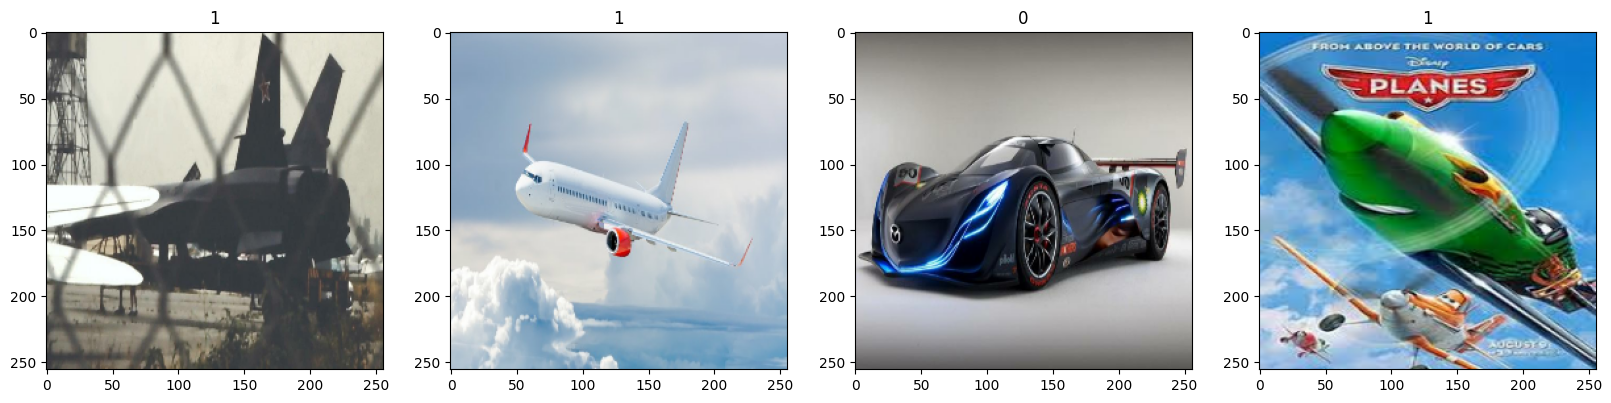

In [12]:
# Tells us that 1 is assigned to planes and 0 is assigned to cars
fig, ax = plt.subplots( ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()[0].max()

1.0

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:
# Check if sizes match with len(data)
train_size+val_size+test_size == len(data)

True

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25


4/4 [==============================] - 3s 527ms/step - loss: 0.8784 - accuracy: 0.5469 - val_loss: 0.6501 - val_accuracy: 0.6406
Epoch 2/25
4/4 [==============================] - 2s 510ms/step - loss: 0.6736 - accuracy: 0.6172 - val_loss: 0.6082 - val_accuracy: 0.6250
Epoch 3/25
4/4 [==============================] - 2s 507ms/step - loss: 0.6316 - accuracy: 0.6016 - val_loss: 0.5931 - val_accuracy: 0.5938
Epoch 4/25
4/4 [==============================] - 2s 519ms/step - loss: 0.5935 - accuracy: 0.6094 - val_loss: 0.5231 - val_accuracy: 0.6250
Epoch 5/25
4/4 [==============================] - 2s 517ms/step - loss: 0.5647 - accuracy: 0.6328 - val_loss: 0.5183 - val_accuracy: 0.8750
Epoch 6/25
4/4 [==============================] - 2s 505ms/step - loss: 0.4889 - accuracy: 0.8359 - val_loss: 0.4319 - val_accuracy: 0.8594
Epoch 7/25
4/4 [==============================] - 2s 501ms/step - loss: 0.4069 - accuracy: 0.8828 - val_loss: 0.3836 - val_accuracy: 0.8594
Epoch 8/25
4/4 [===============

In [34]:
hist.history

{'loss': [0.8783584833145142,
  0.6736101508140564,
  0.6315866708755493,
  0.5935357213020325,
  0.5647095441818237,
  0.48885488510131836,
  0.4069032669067383,
  0.3877178728580475,
  0.3741699755191803,
  0.3162555694580078,
  0.29680335521698,
  0.21127797663211823,
  0.19675707817077637,
  0.14160792529582977,
  0.16696834564208984,
  0.14009582996368408,
  0.11493760347366333,
  0.084891676902771,
  0.07192844152450562,
  0.047949496656656265,
  0.0534520298242569,
  0.034804970026016235,
  0.018269522115588188,
  0.022472422569990158,
  0.012259656563401222],
 'accuracy': [0.546875,
  0.6171875,
  0.6015625,
  0.609375,
  0.6328125,
  0.8359375,
  0.8828125,
  0.8671875,
  0.8125,
  0.8671875,
  0.9140625,
  0.953125,
  0.9453125,
  0.9609375,
  0.9375,
  0.953125,
  0.9765625,
  0.984375,
  0.984375,
  0.9921875,
  0.984375,
  0.9921875,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6500654816627502,
  0.6081702709197998,
  0.5931403040885925,
  0.5231143236160278,
  0.518270611763000

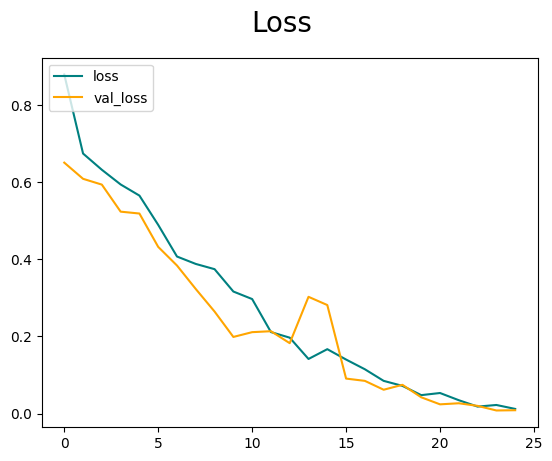

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

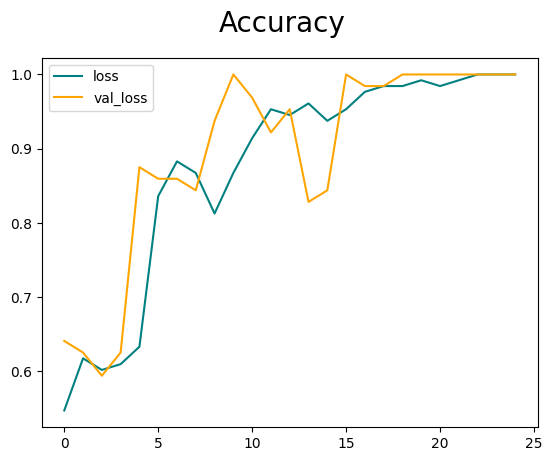

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
prec = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    prec.update_state(y,yhat)
    rec.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 98ms/step


In [43]:
print(f'Precision:{prec.result().numpy()},Recall:{rec.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


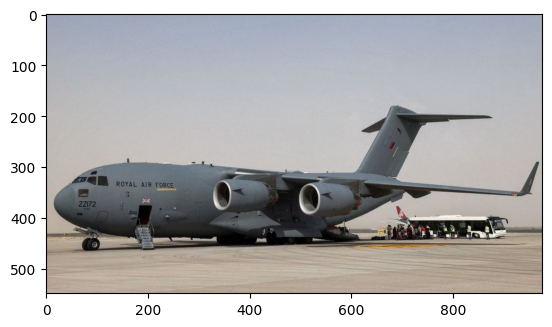

In [44]:
img = cv2.imread('planeTest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

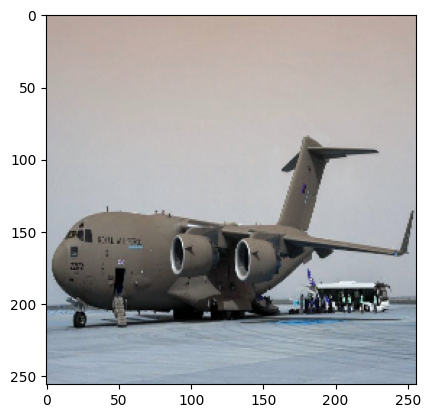

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [47]:
# 1 is plane and 0 is car
# The model predicts that this picture is a plane
yhat

array([[0.735789]], dtype=float32)

In [48]:
if yhat > 0.5:
    print("Predicted class is Plane")
else:
    print("Predicted class is Car")

Predicted class is Plane


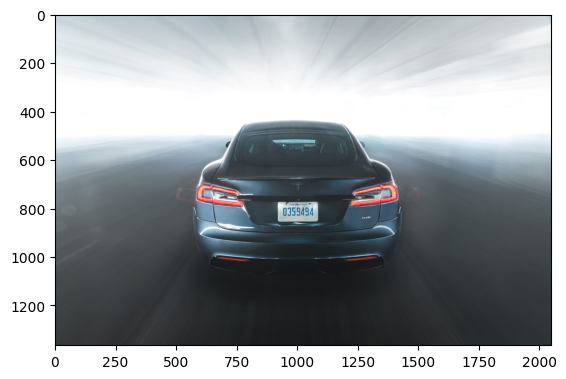

In [49]:
img = cv2.imread('carTest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

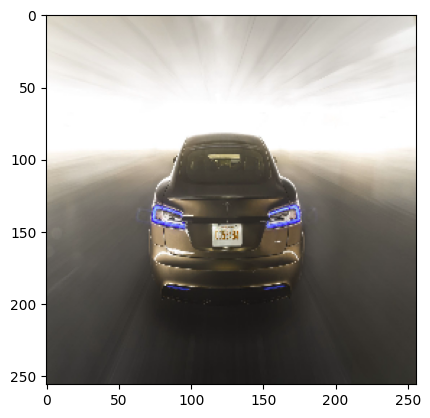

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [52]:
yhat

array([[0.1883338]], dtype=float32)

In [53]:
if yhat > 0.5:
    print("Predicted class is Plane")
else:
    print("Predicted class is Car")

Predicted class is Car


In [54]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'planeOrCarModelForTesting.h5'))

In [57]:
new_model = load_model(os.path.join('models', 'planeOrCarModelForTesting.h5'))

In [58]:
new_model